In [1]:
# importing packages
import pandas as pd
import numpy as np
import json
import seaborn as sns; sns.set() # has to be installed
import matplotlib.pyplot as plt
from sklearn import metrics
import torch

In [39]:
#2D

In [40]:
# loading the data into a dataframe
with open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/diCtNN_Model_27_90epochs_wp/27_CNN_experiment_2D_optimizer_Adam_lr_01_epochs_90_batchsize_16_samplerTclassweightsF_False_scheduler_False/all_results_of_model.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 
def numbers_to_arrays(row):
     predicted_epoch = row['predicted_epoch']
     labels_epoch = row['labels_epoch']
     row['predicted_epoch_array'] = list(map(int, predicted_epoch.split(" ")))
     row['labels_epoch_array'] = list(map(int, labels_epoch.split(" ")))
     return row 
df.stage.replace({'validation': 'Validation', 'training':'Training'}, inplace=True)
df.rename(columns={'stage':'Stage', 'loss':'Loss', 'accuracy':'Accuracy', 'epoch':'Epoch', 'f1_score_macro' : 'F1 Macro Score'}, inplace=True)
df = df.apply(numbers_to_arrays, axis=1)

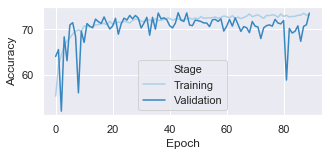

In [41]:
# plotting accuracy
plt.figure(figsize=(5,2))
ax = sns.lineplot(x="Epoch", y="Accuracy", hue="Stage", data=df, palette='Blues')
ax.set(ylim=(51,75))
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/accuracy_diCtNN_Model_27_90epochs_wp.pdf", bbox_inches = 'tight',
    pad_inches = 0)

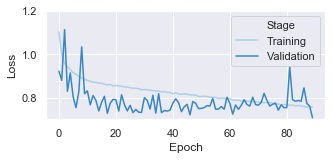

In [42]:
# plotting loss
plt.figure(figsize=(5,2))
ax = sns.lineplot(x="Epoch", y="Loss", hue="Stage", data=df, palette='Blues')
ax.set(ylim=(0.7,1.2))
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/loss_diCtNN_Model_27_90epochs_wp.pdf", bbox_inches = 'tight',
    pad_inches = 0)

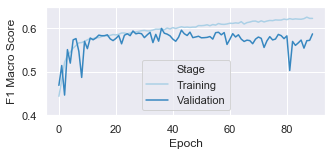

In [43]:
# plotting f1 macro score
plt.figure(figsize=(5,2))
ax = sns.lineplot(x="Epoch", y="F1 Macro Score", hue="Stage", data=df, palette='Blues')
ax.set(ylim=(0.4,0.65))
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/f1_diCtNN_Model_27_90epochs_wp.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [44]:
#1D

In [45]:
# loading the data into a dataframe
with open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/1D_Model_27_90epochs_wp/27_CNN_experiment_1D_optimizer_Adam_lr_01_epochs_90_batchsize_16_samplerTclassweightsF_False_scheduler_False/all_results_of_model.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 
def numbers_to_arrays(row):
     predicted_epoch = row['predicted_epoch']
     labels_epoch = row['labels_epoch']
     row['predicted_epoch_array'] = list(map(int, predicted_epoch.split(" ")))
     row['labels_epoch_array'] = list(map(int, labels_epoch.split(" ")))
     return row 
df.stage.replace({'validation': 'Validation', 'training':'Training'}, inplace=True)
df.rename(columns={'stage':'Stage', 'loss':'Loss', 'accuracy':'Accuracy', 'epoch':'Epoch', 'f1_score_macro' : 'F1 Macro Score'}, inplace=True)
df = df.apply(numbers_to_arrays, axis=1)

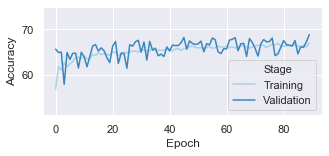

In [46]:
# plotting accuracy
plt.figure(figsize=(5,2))
ax = sns.lineplot(x="Epoch", y="Accuracy", hue="Stage", data=df, palette='Blues')
ax.set(ylim=(51,75))
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/accuracy_1D_Model_27_90epochs_wp.pdf", bbox_inches = 'tight',
    pad_inches = 0)

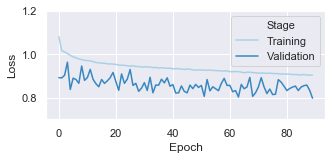

In [47]:
# plotting loss
plt.figure(figsize=(5,2))
ax = sns.lineplot(x="Epoch", y="Loss", hue="Stage", data=df, palette='Blues')
ax.set(ylim=(0.7,1.2))
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/loss_1D_Model_27_90epochs_wp.pdf", bbox_inches = 'tight',
    pad_inches = 0)

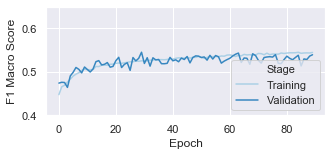

In [48]:
# plotting f1 macro score
plt.figure(figsize=(5,2))
ax = sns.lineplot(x="Epoch", y="F1 Macro Score", hue="Stage", data=df, palette='Blues')
ax.set(ylim=(0.4,0.65))
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/f1_1D_Model_27_90epochs_wp.pdf", bbox_inches = 'tight',
    pad_inches = 0)

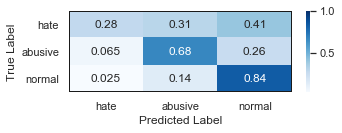

In [26]:
# Plotting Confusion Matrix
# specify epoch
epoch =36
df = df[df.Stage == 'Validation']
labels = df[df.Epoch == epoch].labels_epoch_array.values[0]
predicted = df[df.Epoch == epoch].predicted_epoch_array.values[0]
confusion_matrix = metrics.confusion_matrix(labels, predicted, normalize='true')
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted Label'
plt.figure(figsize=(5,1.5))
ax = sns.heatmap(df_cm, cmap=plt.cm.Blues, annot=True, vmax=1.0, xticklabels=['hate', 'abusive', 'normal'], yticklabels=['hate', 'abusive', 'normal'])
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=df_cm.shape[1], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=df_cm.shape[0], color='k',linewidth=2)
fig = ax.get_figure()
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/comparing_model_results/confusion_matrix_diCtNN_Model_27_90epochs_wp_e36.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [27]:
df = df[df.Stage == 'Validation']
classification_report_str = df[df.Epoch == 36].classification_report_str.values
print('|'+ classification_report_str[0], sep=" ", file= open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/comparing_model_results/classification_result_diCtNN_Model_27_90epochs_wp_e36.txt", 'a'))

In [ ]:
#### END OF Co-Visualisation Pattern ####

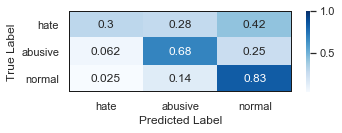

In [4]:
# Testing Results
# loading the data and plotting confusion matrix and classification report

# opening the json file and converting into pandas dataframe
with open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Testing/FINAL_TESTING_2D/testing_CNN_experiment_2D/all_results_of_model.json") as f:
    json_data = json.load(f)


# Confusion Matrix
# function to turn numbers seperated by space into array
def numbers_to_array(numbers):
    array = list(map(int, numbers.split(" ")))
    return array 

predicted = json_data['predicted_epoch']
predicted = numbers_to_array(predicted)
labels = json_data['labels_epoch']
labels = numbers_to_array(labels)

confusion_matrix = metrics.confusion_matrix(labels, predicted, normalize='true')
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted Label'
plt.figure(figsize=(5,1.5))
ax = sns.heatmap(df_cm, cmap=plt.cm.Blues, annot=True, vmax=1.0, xticklabels=['hate', 'abusive', 'normal'], yticklabels=['hate', 'abusive', 'normal'])
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=df_cm.shape[1], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=df_cm.shape[0], color='k',linewidth=2)
fig = ax.get_figure()
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Testing/comparing_model_results/confusion_matrix_testing_CNN_experiment_2D_FINAL.pdf", bbox_inches = 'tight',
    pad_inches = 0)

# Classification report
print('|'+ json_data['classification_report_str'], sep=" ", file= open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Testing/comparing_model_results/classification_report_testing_CNN_experiment_2D_FINAL.txt", 'a'))


In [5]:
# Checking which tweets got better classified with our approach

# opening the json file and converting into pandas dataframe
with open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Testing/FINAL_TESTING_1D/testing_CNN_experiment_1D/all_results_of_model.json") as f:
    json_data = json.load(f)

# function to turn numbers seperated by space into array
def numbers_to_array(numbers):
    array = list(map(int, numbers.split(" ")))
    return array 

predicted = json_data['predicted_epoch']
predicted_1D = numbers_to_array(predicted)
labels = json_data['labels_epoch']
labels_1D = numbers_to_array(labels)

# opening the json file and converting into pandas dataframe
with open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Testing/FINAL_TESTING_2D/testing_CNN_experiment_2D/all_results_of_model.json") as f:
    json_data = json.load(f)

# function to turn numbers seperated by space into array
def numbers_to_array(numbers):
    array = list(map(int, numbers.split(" ")))
    return array 

predicted = json_data['predicted_epoch']
predicted_2D = numbers_to_array(predicted)
labels = json_data['labels_epoch']
labels_2D = numbers_to_array(labels)

df = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/test_set_wp.csv")

df.rename(columns={'tweet':'cleaned_tweet'}, inplace=True)

#df['labels_1D'] = labels_1D
#df['labels_2D'] = labels_2D
df['predicted_1D'] = predicted_1D
df['predicted_2D'] = predicted_2D

df_original_dataframe = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/data.csv")

df_final = pd.merge(df, df_original_dataframe, on=['id', 'label', 'count'] , how='left', validate="1:1")

tensor_2d = torch.load("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/test_vectorized_2d_wp.pt")

# def calculating_hatefulness(row):
#     print(row)
#     index = row.index.item()
#     #print(index)
#     hatefulness = torch.sum(tensor_2d[index][1]).numpy()
#     #print(hatefulness)
#     row['hatefulness'] = hatefulness
#     return row

#df_final_with_hate = df_final.apply(calculating_hatefulness, 0)

#df_final['hatefulness'] = 0

hatefulness = []

for index, row in df_final.iterrows():
    print('index: ', index)
    hate = torch.sum(tensor_2d[index][1]).numpy().item()
    print('hatefulness: ', hate)
    hatefulness.append(hate)
    #hatefulness = hatefulness[0]
   
    #df.at[index, 'hatefulness'] = hate
    #df_final.iloc[[index]]['hatefulness'] = hate
df_final['hatefulness'] = hatefulness


052
hatefulness:  34.0
index:  16053
hatefulness:  77.20374298095703
index:  16054
hatefulness:  96.50467681884766
index:  16055
hatefulness:  0.0
index:  16056
hatefulness:  51.0
index:  16057
hatefulness:  82.60187530517578
index:  16058
hatefulness:  78.0
index:  16059
hatefulness:  0.0
index:  16060
hatefulness:  268.33331298828125
index:  16061
hatefulness:  114.61904907226562
index:  16062
hatefulness:  0.0
index:  16063
hatefulness:  143.89761352539062
index:  16064
hatefulness:  77.20374298095703
index:  16065
hatefulness:  0.0
index:  16066
hatefulness:  0.0
index:  16067
hatefulness:  93.85714721679688
index:  16068
hatefulness:  246.42855834960938
index:  16069
hatefulness:  328.631591796875
index:  16070
hatefulness:  36.0
index:  16071
hatefulness:  0.0
index:  16072
hatefulness:  0.0
index:  16073
hatefulness:  0.0
index:  16074
hatefulness:  133.95559692382812
index:  16075
hatefulness:  150.0
index:  16076
hatefulness:  166.36917114257812
index:  16077
hatefulness:  50.

In [7]:
# getting hate tweet which was originally predicted to be normal
df_hate_predicted_as_normal = df_final[(df_final['label']== 0 ) & (df_final['predicted_1D'] == 2)]
print(df_hate_predicted_as_normal.hatefulness.mean())

91.46474069828609


In [13]:
# getting hate tweet which was originally predicted to be normal
df_hate_predicted_as_normal = df_final[(df_final['label']== 0 ) & (df_final['predicted_2D'] == 2)]

In [10]:
df_sub = df_final[(df_final['label']== 0 )]
print(df_sub.hatefulness.mean())

126.27807369968069


In [11]:
df_sub = df_final[(df_final['label']== 1 )]
print(df_sub.hatefulness.mean())

89.91189089481341


In [12]:
df_sub = df_final[(df_final['label']== 2)]
print(df_sub.hatefulness.mean())

56.26353823019937


In [164]:
# predictions model 1d
for integer in [0,1,2]:
    df_predicted = df_final[(df_final['predicted_1D'] == integer)]
    print(df_predicted.hatefulness.mean())

142.0923085859124
71.94175715800095
67.64039213032223


In [165]:
# predictions model 2d
for integer in [0,1,2]:
    df_predicted = df_final[(df_final['predicted_2D'] == integer)]
    print(df_predicted.hatefulness.mean())

198.41186413142992
84.60689322133229
55.6762163876706


In [131]:
# correct predictions model 1d
for integer in [0,1,2]:
    df_predicted = df_final[(df_final['label']== integer ) & (df_final['predicted_1D'] == integer)]
    print(df_predicted.hatefulness.mean())

200.99627144839786
75.10993758859397
56.29350249419341


In [132]:
# correct predictions model 2d
for integer in [0,1,2]:
    df_predicted = df_final[(df_final['label']== integer ) & (df_final['predicted_2D'] == integer)]
    print(df_predicted.hatefulness.mean())

240.1232644434898
88.00755936260244
54.581694014368374


In [133]:
# false predictions model 1d
for integer in [0,1,2]:
    df_predicted = df_final[(df_final['label']== integer ) & (df_final['predicted_1D'] != integer)]
    print(df_predicted.hatefulness.mean())

104.29620175741302
114.39530506913286
56.17530784849797


In [134]:
# false predictions model 2d
for integer in [0,1,2]:
    df_predicted = df_final[(df_final['label']== integer ) & (df_final['predicted_2D'] != integer)]
    print(df_predicted.hatefulness.mean())

86.5683587848218
93.74780588489145
64.49223526988341


In [160]:
# a suitable example
# getting hate tweet which was originally predicted to be normal

index = 2843

print(df_final[df_final.index == index].tweet.values[0])
print(df_final[df_final.index == index].cleaned_tweet.values[0])
# chinks = A person of Chinese descent. Considered extremely derogatory, exemplified by a US school that had to stop using the term as a sports mascot in 1980. 
tensor_2d[index]

@seanhannity @newtgingrich @IngrahamAngle @LouDobbs @Austan_Goolsbee @AriFleischer Fuckin AWFUL lineup! I refuse to watch this GARBAGE!!!
fuckin awful lineup! i refuse to watch this garbage!!!


tensor([[  101.,  6616.,  2378.,  9643., 10515.,   999.,  1045., 10214.,  2000.,
          3422.,  2023., 13044.,   999.,   999.,   999.,   102.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,    

In [8]:
# getting hate tweet which was originally predicted to be abusive
df_hate_1D_abusive = df_final[(df_final['label']== 0 ) & (df_final['predicted_1D'] == 1) & (df_final['predicted_2D'] == 0)]

In [9]:
# a suitable example
# getting hate tweet which was originally predicted to be abusive

index = 5273

print(df_final[df_final.index == index].tweet.values[0])

# chinks = A person of Chinese descent. Considered extremely derogatory, exemplified by a US school that had to stop using the term as a sports mascot in 1980. 
tensor_2d[index]

@PatriotsOrg Screw the ragheads.


tensor([[  101.0000, 11224.0000,  1996.0000, 17768.0000, 13038.0000,   102.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0

In [10]:
# getting hate tweet which originally was predicted hate but now is normal
df_hate_to_normal = df_final[(df_final['label']== 0 ) & (df_final['predicted_1D'] == 0) & (df_final['predicted_2D'] == 2)]

In [11]:
# a suitable example
# getting hate tweet which was originally predicted to be abusive

index = 2850

print(df_final[df_final.index == index].tweet.values[0])

tensor_2d[index]

She text me "I hate you, I hate you, I hate you, I hate you" But how the fuck can you hate me?&#129335;&#127995;‍♂️&#128524;


tensor([[ 101., 2016., 3793., 2033., 1045., 5223., 2017., 1045., 5223., 2017.,
         1045., 5223., 2017., 1045., 5223., 2017., 2021., 2129., 1996., 6616.,
         2064., 2017., 5223., 2033.,  102.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0., 

In [12]:
# getting abusive tweet that was missclassified as normal
df_abusive_to_normal = df_final[(df_final['label']== 1 ) & (df_final['predicted_1D'] == 1) & (df_final['predicted_2D'] == 2)]

In [7]:
# a suitable example
# getting hate tweet which was originally predicted to be abusive

index = 416

print(df_final[df_final.index == index].tweet.values[0])

tensor_2d[index]

In P5, worst case scenario is you get a bad item and they leave. In mainline, they steal your items, money, SP, HP, and kick you in the dick


tensor([[  101.0000,  1999.0000,  1052.0000,  2629.0000,  5409.0000,  2553.0000,
         11967.0000,  2003.0000,  2017.0000,  2131.0000,  1037.0000,  2919.0000,
          8875.0000,  1998.0000,  2027.0000,  2681.0000,  1999.0000, 20575.0000,
          2027.0000,  8954.0000,  2115.0000,  5167.0000,  2769.0000, 11867.0000,
          6522.0000,  1998.0000,  5926.0000,  2017.0000,  1999.0000,  1996.0000,
          5980.0000,   102.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0

In [8]:
torch.sum(tensor_2d[416][1])

tensor(128.4138)

In [86]:
# calculating the avarage hatefullness of tensors in testing set

#label classes
hate_indices = df_final[df_final.label==0].index
abusive_indices = df_final[df_final.label==1].index
normal_indices = df_final[df_final.label==2].index
avarage_hatefuleness_hate = torch.sum(tensor_2d[hate_indices][1])/len(hate_indices)
avarage_hatefuleness_abusive= torch.sum(tensor_2d[abusive_indices][1])/len(abusive_indices)
avarage_hatefuleness_normal = torch.sum(tensor_2d[normal_indices][1])/len(normal_indices)


# predicted 1d
predicted_hate_1d_indices = df_final[df_final.predicted_1D == 0].index
predicted_abusive_1d_indices = df_final[df_final.predicted_1D ==1].index
predicted_normal_1d_indices = df_final[df_final.predicted_1D ==2].index
avarage_hatefuleness_predicted_hate_1d = torch.sum(tensor_2d[predicted_hate_1d_indices][1])/len(predicted_hate_1d_indices)
avarage_hatefuleness_predicted_abusive_1d = torch.sum(tensor_2d[predicted_abusive_1d_indices][1])/len(predicted_abusive_1d_indices)
avarage_hatefuleness_predicted_normal_1d = torch.sum(tensor_2d[predicted_normal_1d_indices][1])/len(predicted_normal_1d_indices)

# correctly predicted 1d
correctly_predicted_hate_1d_indices = df_final[(df_final.predicted_1D == 0 )& (df_final.label==0)].index
correctly_predicted_abusive_1d_indices = df_final[(df_final.predicted_1D ==1) & (df_final.label==1)].index
correctly_predicted_normal_1d_indices = df_final[(df_final.predicted_1D ==2) & (df_final.label==2)].index
avarage_hatefuleness_correctly_predicted_hate_1d = torch.sum(tensor_2d[correctly_predicted_hate_1d_indices][1])/len(correctly_predicted_hate_1d_indices)
avarage_hatefuleness_correctly_predicted_abusive_1d = torch.sum(tensor_2d[correctly_predicted_abusive_1d_indices][1])/len(correctly_predicted_abusive_1d_indices)
avarage_hatefuleness_correctly_predicted_normal_1d = torch.sum(tensor_2d[correctly_predicted_normal_1d_indices][1])/len(correctly_predicted_normal_1d_indices)



# predicted 2d
predicted_hate_2d_indices = df_final[df_final.predicted_2D == 0].index
predicted_abusive_2d_indices = df_final[df_final.predicted_2D ==1].index
predicted_normal_2d_indices = df_final[df_final.predicted_2D ==2].index
avarage_hatefuleness_predicted_hate_2d = torch.sum(tensor_2d[predicted_hate_2d_indices][1])/len(predicted_hate_2d_indices)
avarage_hatefuleness_predicted_abusive_2d = torch.sum(tensor_2d[predicted_abusive_2d_indices][1])/len(predicted_abusive_2d_indices)
avarage_hatefuleness_predicted_normal_2d = torch.sum(tensor_2d[predicted_normal_2d_indices][1])/len(predicted_normal_2d_indices)

# correctly predicted 2d
correctly_predicted_hate_2d_indices = df_final[(df_final.predicted_2D == 0 )& (df_final.label==0)].index
correctly_predicted_abusive_2d_indices = df_final[(df_final.predicted_2D ==1) & (df_final.label==1)].index
correctly_predicted_normal_2d_indices = df_final[(df_final.predicted_2D) ==2 & (df_final.label==2)].index
avarage_hatefuleness_correctly_predicted_hate_2d = torch.sum(tensor_2d[correctly_predicted_hate_2d_indices][1])/len(correctly_predicted_hate_2d_indices)
avarage_hatefuleness_correctly_predicted_abusive_2d = torch.sum(tensor_2d[correctly_predicted_abusive_2d_indices][1])/len(correctly_predicted_abusive_2d_indices)
avarage_hatefuleness_correctly_predicted_normal_2d = torch.sum(tensor_2d[correctly_predicted_normal_2d_indices][1])/len(correctly_predicted_normal_2d_indices)

# edgecases
hate_classified_normal_indices_1d = df_final[(df_final['label']== 0 ) & (df_final['predicted_1D'] == 2)].index
avarage_hatefuleness_hate_classified_normal_indices_1d = torch.sum(tensor_2d[hate_classified_normal_indices_1d][1])/len(hate_classified_normal_indices_1d)

hate_classified_normal_indices_2d = df_final[(df_final['label']== 0 ) & (df_final['predicted_2D'] == 2)].index
avarage_hatefuleness_hate_classified_normal_indices_2d = torch.sum(tensor_2d[hate_classified_normal_indices_2d][1])/len(hate_classified_normal_indices_2d)

print('label classes')
print('hate - avarage hatefulness per tweet: ', avarage_hatefuleness_hate.numpy())
print('abusive - avarage hatefulness per tweet: ',avarage_hatefuleness_abusive.numpy())
print('normal - avarage hatefulness per tweet: ',avarage_hatefuleness_normal.numpy())
print('predicted 1d classes')
print('hate - avarage hatefulness per tweet: ', avarage_hatefuleness_predicted_hate_1d.numpy())
print('abusive - avarage hatefulness per tweet: ',avarage_hatefuleness_predicted_abusive_1d.numpy())
print('normal - avarage hatefulness per tweet: ',avarage_hatefuleness_predicted_normal_1d.numpy())
print('correctly predicted 1d classes')
print('hate - avarage hatefulness per tweet: ', avarage_hatefuleness_correctly_predicted_hate_1d.numpy())
print('abusive - avarage hatefulness per tweet: ',avarage_hatefuleness_correctly_predicted_abusive_1d.numpy())
print('normal - avarage hatefulness per tweet: ',avarage_hatefuleness_correctly_predicted_normal_1d.numpy())
print('predicted 2d classes')
print('hate - avarage hatefulness per tweet: ', avarage_hatefuleness_predicted_hate_2d.numpy())
print('abusive - avarage hatefulness per tweet: ',avarage_hatefuleness_predicted_abusive_2d.numpy())
print('normal - avarage hatefulness per tweet: ',avarage_hatefuleness_predicted_normal_2d.numpy())
print('correctly predicted 2d classes')
print('hate - avarage hatefulness per tweet: ', avarage_hatefuleness_correctly_predicted_hate_2d.numpy())
print('abusive - avarage hatefulness per tweet: ',avarage_hatefuleness_correctly_predicted_abusive_2d.numpy())
print('normal - avarage hatefulness per tweet: ',avarage_hatefuleness_correctly_predicted_normal_2d.numpy())
print('edgecases 1d')
print('hate_classified_normal - avarage hatefulness per tweet: ', avarage_hatefuleness_hate_classified_normal_indices_1d.numpy())
print('edgecases 2d')
print('hate_classified_normal - avarage hatefulness per tweet: ', avarage_hatefuleness_hate_classified_normal_indices_2d.numpy())


label classes
hate - avarage hatefulness per tweet:  95.29878
abusive - avarage hatefulness per tweet:  13.505395
normal - avarage hatefulness per tweet:  11.347821
predicted 1d classes
hate - avarage hatefulness per tweet:  90.25825
abusive - avarage hatefulness per tweet:  8.452711
normal - avarage hatefulness per tweet:  13.875143
correctly predicted 1d classes
hate - avarage hatefulness per tweet:  322.07745
abusive - avarage hatefulness per tweet:  7.2785954
normal - avarage hatefulness per tweet:  8.088958
predicted 2d classes
hate - avarage hatefulness per tweet:  46.015774
abusive - avarage hatefulness per tweet:  15.133967
normal - avarage hatefulness per tweet:  13.182926
correctly predicted 2d classes
hate - avarage hatefulness per tweet:  283.11646
abusive - avarage hatefulness per tweet:  22.073921
normal - avarage hatefulness per tweet:  46.015774
edgecases 1d
hate_classified_normal - avarage hatefulness per tweet:  210.57956
edgecases 2d
hate_classified_normal - avarage 

In [45]:
df1 = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/data_cleaned.csv")

tweet = df1.loc[[623]].tweet.values
df3 = df1.dropna(axis=0, subset=['tweet'])
tweet
#df.to_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/train_set_test_slice.csv")

array([' wheres the fucking album'], dtype=object)

In [ ]:
#### end of analysis section ####

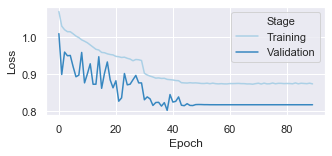

In [129]:
# plotting loss
plt.figure(figsize=(5,2))
ax = sns.lineplot(x="Epoch", y="Loss", hue="Stage", data=df, palette='Blues')
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/loss_90epochs.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [130]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="f1_score_macro", hue="stage", data=df)

ValueError: Could not interpret input 'epoch'

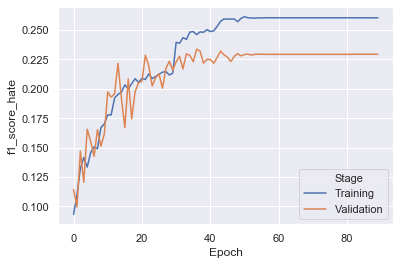

In [131]:
# plotting f1_score hate
ax = sns.lineplot(x="Epoch", y="f1_score_hate", hue="Stage", data=df)

In [132]:
df = df[df.Stage == 'Validation']
classification_report_str = df[df.Epoch == 37].classification_report_str.values
print('|'+ classification_report_str[0], sep=" ")

In [133]:
print('|'+ classification_report_str[0], sep=" ")

|              precision    recall  f1-score   support

           0       0.21      0.26      0.23       966
           1       0.69      0.67      0.68      6969
           2       0.75      0.75      0.75      8678

    accuracy                           0.69     16613
   macro avg       0.55      0.56      0.55     16613
weighted avg       0.69      0.69      0.69     16613



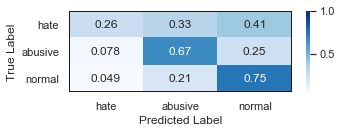

In [134]:
# Plotting Confusion Matrix
# specify epoch
epoch = 37
df = df[df.Stage == 'Validation']
labels = df[df.Epoch == epoch].labels_epoch_array.values[0]
predicted = df[df.Epoch == epoch].predicted_epoch_array.values[0]
confusion_matrix = metrics.confusion_matrix(labels, predicted, normalize='true')
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted Label'
plt.figure(figsize=(5,1.5))
ax = sns.heatmap(df_cm, cmap=plt.cm.Blues, annot=True, vmax=1.0, xticklabels=['hate', 'abusive', 'normal'], yticklabels=['hate', 'abusive', 'normal'])
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=df_cm.shape[1], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=df_cm.shape[0], color='k',linewidth=2)
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/confusion_matrix.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [135]:
#FIRST BEST RUN BASED FROM GRID SEARCH ACCORDING TO F1 MACRO SCORE

In [136]:
# creating dataframe from epochs in json file
with open("exchange_base/Model_Results/FirstGridSearch/26_CNN_experiment_optimizer_Adam_lr_01_epochs_30_batchsize_16_samplerTclassweightsF_False_scheduler_True/all_results_of_model.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 

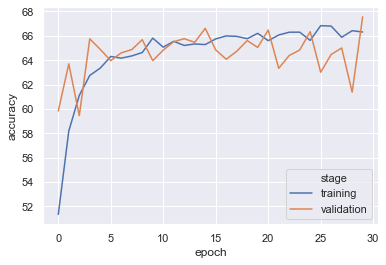

In [137]:
# plotting accuracy
ax = sns.lineplot(x="epoch", y="accuracy", hue="stage", data=df)

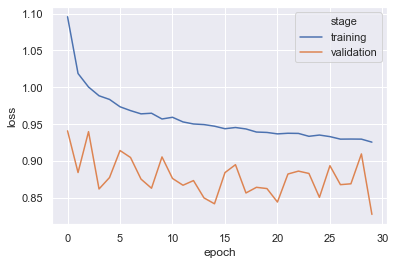

In [138]:
# plotting loss
ax = sns.lineplot(x="epoch", y="loss", hue="stage", data=df)

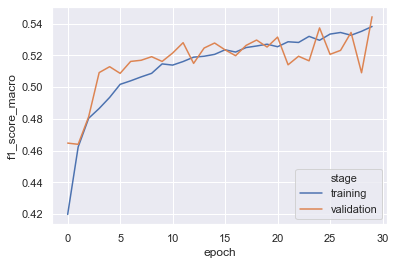

In [139]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="f1_score_macro", hue="stage", data=df)

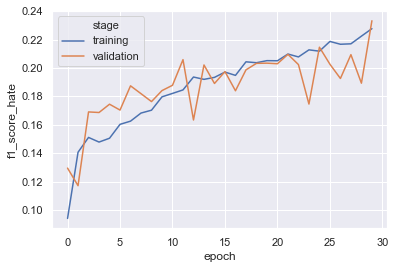

In [140]:
# plotting f1 score hate
ax = sns.lineplot(x="epoch", y="f1_score_hate", hue="stage", data=df)

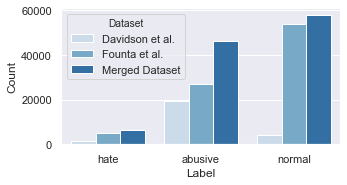

In [144]:

url_davidson = "/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/data/twitter data/davidson et al/labeled_data.csv"
url_founta = "/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/data/twitter data/founta et al/hatespeech_text_label_vote.csv"

data_davidson = pd.read_csv(url_davidson, names=["count", "hate_speech", "offensive_language", "neither", "label", "tweet"], header=1)
data_founta = pd.read_csv(url_founta, sep='\t', names=["tweet", "label_text", "count"])

data_founta = data_founta[~data_founta.label_text.str.contains("spam")]
data_founta['label'] = data_founta.label_text.replace({'hateful': '0', 'abusive': '1', 'normal': '2'}).astype('int')

data_resulting = pd.read_csv('/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/data.csv')

data_davidson['Dataset'] = 'Davidson et al.'
data_founta['Dataset'] = 'Founta et al.'
data_resulting['Dataset'] = 'Merged Dataset'
df = pd.concat([data_davidson, data_founta, data_resulting])
df.rename(columns={'label':'Label', 'count':'Count'}, inplace=True)
df.Label.replace({0: 'hate', 1:'abusive', 2:'normal'}, inplace=True)
plt.figure(figsize=(5,2.5))
count = sns.countplot(x="Label", hue="Dataset", data=df, palette='Blues', order = ['hate', 'abusive', 'normal'])
count.set(xlabel="Label", ylabel = "Count")
fig = count.get_figure()

fig.savefig('/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/dataset_merging.pdf', bbox_inches = 'tight',
    pad_inches = 0)

In [142]:
len(data_resulting)

110748

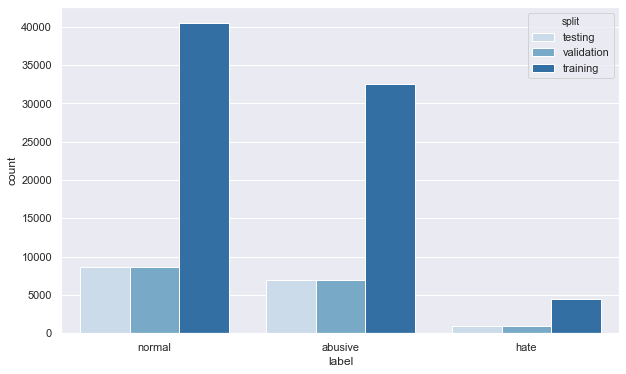

In [143]:
df_test = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/test_set.csv")
df_val = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/val_set.csv")
df_train = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/train_set.csv")
df_test['split'] = 'testing'
df_val['split'] ='validation'
df_train['split']='training'
df = pd.concat([df_test, df_val, df_train])
df.label.replace({0: 'hate', 1:'abusive', 2:'normal'}, inplace=True)
plt.figure(figsize=(10, 6))
sns.countplot(x="label", hue="split", data=df, palette='Blues', )
plt.show()

In [12]:
import re
test = "this is. a very! *good? th*ng?!?!?* isn't, it?"
#test.replace(',',' , ').replace('.',' . ').replace('?',' ? ').replace('!',' ! ').replace(';', ' , ').split()
test2 = re.findall(r"\w+|[^\w\s]", test, re.UNICODE)
print(test2)

['this', 'is', '.', 'a', 'very', '!', '*', 'good', '?', 'th', '*', 'ng', '?', '!', '?', '!', '?', '*', 'isn', "'", 't', ',', 'it', '?']


In [15]:
df = pd.read_csv('/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/data/dictionary/hatebase/full_dictionary.csv')